In [13]:
import numpy as np

import matplotlib.pyplot as plt

In [14]:
def initialize_spin_lattice(L):
    return np.random.choice([1, -1], size=(L, L))


In [15]:

def get_neighbors_2d(y, x, lattice_array):
    L,L = lattice_array.shape
    up = ((y - 1) % L, x)
    down = ((y + 1) % L, x)
    left = (y, (x - 1) % L)
    right = (y, (x + 1) % L)
    return left, right, up, down

In [16]:
def mc_move_2d_ising(lattice_array, beta):
    im_L, L = lattice_array.shape
    J = 1
    for i in range(0, im_L * L):
        x = np.random.randint(0, L)
        y = np.random.randint(0, L)
        spin_index = lattice_array[y, x]
        neighbors = get_neighbors_2d(y, x, lattice_array)
        delta_E = 2 * J * spin_index * sum(lattice_array[neighbor] for neighbor in neighbors)
        if delta_E <= 0 or (np.random.rand() < np.exp(-delta_E * beta)):
            lattice_array[y, x] *= -1
    return lattice_array

In [17]:
def calculate_magnetization(lattice):
    return np.abs(np.sum(lattice))

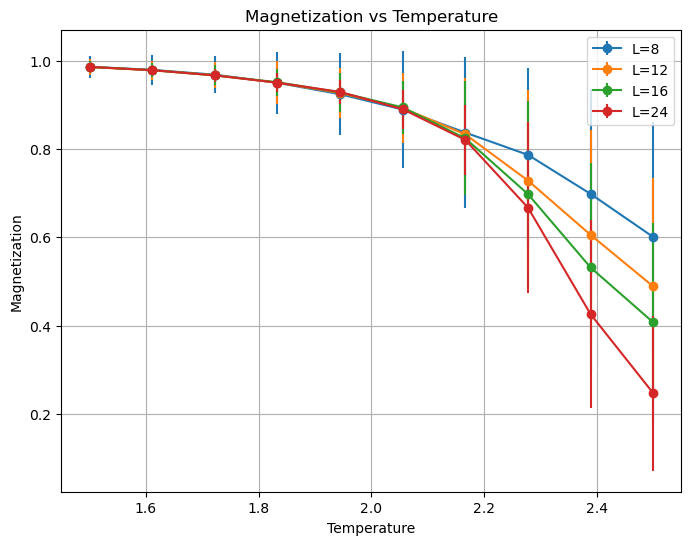

In [18]:
# Parameters
L_values = [8, 12, 16, 24]
num_steps = 10000
equilibration_steps = 500
temperatures = np.linspace(1.5, 2.5, 10)

plt.figure(figsize=(8, 6))

# Run simulation for each lattice size
for L in L_values:
    magnetizations = []
    magnetization_errors = []
    for T in temperatures:
        lattice = initialize_spin_lattice(L)
        magnetization_measurements = []
        for step in range(num_steps):
            lattice = mc_move_2d_ising(lattice, 1.0/T)
            if step >= equilibration_steps:
                magnetization_measurements.append(calculate_magnetization(lattice))
        average_magnetization = np.mean(magnetization_measurements)
        magnetization_error = np.std(magnetization_measurements)
        magnetizations.append(average_magnetization / (L * L))
        magnetization_errors.append(magnetization_error / (L * L))
    plt.errorbar(temperatures, magnetizations, yerr=magnetization_errors, fmt='o-', label=f'L={L}')

plt.xlabel('Temperature')
plt.ylabel('Magnetization')
plt.title('Magnetization vs Temperature')
plt.legend()
plt.grid(True)
plt.show()